Matplotlib is building the font cache; this may take a moment.



Biggest Price Changes:
Empty DataFrame
Columns: [date, price_change_pct, news_titles]
Index: []


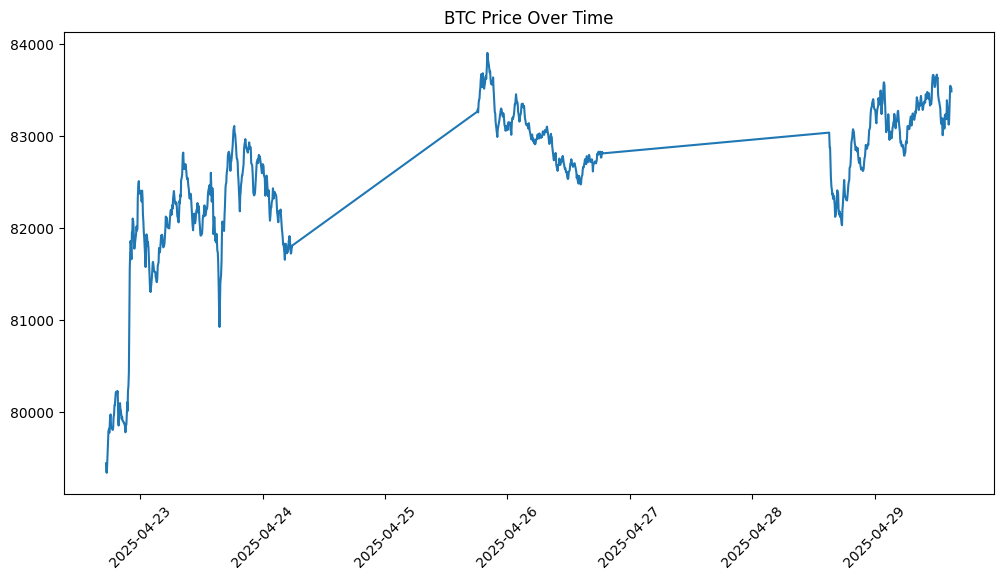


Days with Most News:
                       date  price_change_pct  news_count  \
745 2025-04-28 15:05:25.664          0.272858          18   
746 2025-04-28 15:11:26.585         -0.195745          18   
747 2025-04-28 15:16:03.496         -0.001418          18   
748 2025-04-28 15:20:18.090         -0.186002          18   
749 2025-04-28 15:25:54.846         -0.213558          18   

                                           news_titles  
745  ProShares Gets SEC Greenlight for Three XRP ET...  
746  ProShares Gets SEC Greenlight for Three XRP ET...  
747  ProShares Gets SEC Greenlight for Three XRP ET...  
748  ProShares Gets SEC Greenlight for Three XRP ET...  
749  ProShares Gets SEC Greenlight for Three XRP ET...  

Today's Market Summary:
Price Range: 82788.5558969312 - 83670.26901765414
Average Price: 83257.60

Latest News (15 articles today):
- UK Government Releases Draft Crypto Rules
- How $330M BTC Hacker May Have Doubled Down on Monero Derivatives
- CoinDesk 20 Performance

In [ ]:
# notebooks/price_news_analysis.ipynb
import sys
from pathlib import Path
import importlib

# Add project root to Python path
project_root = str(Path.cwd().parent.parent)  # if notebook is in notebooks/
sys.path.append(project_root)

from src.analysis.market_analyzer import MarketAnalyzer
from src.storage.database import DatabaseManager
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Initialize analyzer
db = DatabaseManager()
with db.get_session() as session:
    analyzer = MarketAnalyzer(session)
    
    # Get last 7 days of data
    analysis = analyzer.get_price_with_news(days=7)
    
    # Convert to DataFrame for easier analysis
    data = []
    for item in analysis:
        data.append({
            'date': item.date,
            'price': item.price_data.price,
            'price_change': item.price_change,
            'price_change_pct': item.price_change_percentage,
            'news_count': len(item.news_items),
            'news_titles': ', '.join([n.title for n in item.news_items])
        })
    
    df = pd.DataFrame(data)
    
    # 1. Find biggest price movements
    print("\nBiggest Price Changes:")
    significant_moves = df[abs(df['price_change_pct']) > 2]  # More than 2% change
    print(significant_moves[['date', 'price_change_pct', 'news_titles']])
    
    # 2. Plot price movements
    plt.figure(figsize=(12, 6))
    plt.plot(df['date'], df['price'])
    plt.title('BTC Price Over Time')
    plt.xticks(rotation=45)
    plt.show()
    
    # 3. Analyze news impact
    print("\nDays with Most News:")
    high_news_days = df.nlargest(5, 'news_count')
    print(high_news_days[['date', 'price_change_pct', 'news_count', 'news_titles']])
    
    # 4. Get today's summary
    summary = analyzer.get_daily_summary()
    print("\nToday's Market Summary:")
    print(f"Price Range: {summary['price_summary']['low']} - {summary['price_summary']['high']}")
    print(f"Average Price: {summary['price_summary']['average']:.2f}")
    print(f"\nLatest News ({summary['news_count']} articles today):")
    for news in summary['latest_news']:
        print(f"- {news['title']}")

    # 5. Calculate correlations
    print("\nCorrelation Analysis:")
    df['has_news'] = df['news_count'] > 0
    avg_change_with_news = df[df['has_news']]['price_change_pct'].mean()
    avg_change_without_news = df[~df['has_news']]['price_change_pct'].mean()
    print(f"Avg price change with news: {avg_change_with_news:.2f}%")
    print(f"Avg price change without news: {avg_change_without_news:.2f}%")